In [3]:
import os
import mat73
path = './'
fname = os.path.join(path, 'Dataset2.mat')

from scipy.io import loadmat
DATA = mat73.loadmat(fname)

In [23]:
import numpy as np

In [5]:
DATA.keys()

dict_keys(['monkeyL', 'monkeyN'])

In [6]:
%whos

Variable   Type        Data/Info
--------------------------------
DATA       dict        n=2
fname      str         ./Dataset2.mat
loadmat    function    <function loadmat at 0x111603e60>
mat73      module      <module 'mat73' from '/Us<...>kages/mat73/__init__.py'>
os         module      <module 'os' from '/Users<...>da3/lib/python3.7/os.py'>
path       str         ./


In [10]:
DATA['monkeyL'].keys()

dict_keys(['MT', 'PT', 'RT', 'force', 'grip', 'neuron', 'spikes'])

In [42]:
nTime, nNeuron, nTrial = DATA['monkeyL']['spikes'].shape

In [73]:
spikes = DATA['monkeyL']['spikes']

In [20]:
neurons = DATA['monkeyL']['neuron']

In [81]:
grips = DATA['monkeyL']['grip']

In [33]:
import matplotlib.pyplot as plt

# without smoothing

In [120]:
for j in range(134):
    s = 0
    for i in range(20):
        s = s + spikes[i][0][j]
    print(s)

1.0
0.0
2.0
0.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
2.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
2.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
1.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
2.0
1.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0


In [115]:
bin_spikes[0][0]

array([1., 0., 2., 0., 1., 0., 0., 0., 1., 1., 0., 0., 2., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 2., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 2., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 2., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 2., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 2., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0.])

In [75]:
bin_spikes = spikes.reshape(int(5500/20), 20, 93, 134)
bin_spikes = bin_spikes.sum(axis = 1)

In [77]:
bin_spikes.shape

(275, 93, 134)

In [ ]:
s_bin_spikes

In [121]:
grips

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [122]:
(grips == 2).sum()

64

In [123]:
SG_bin_spikes.shape

(275, 93, 70)

In [124]:
SG_bin_spikes = bin_spikes[:,:,:70]
PG_bin_spikes = bin_spikes[:,:,70:]

In [125]:
trail_averaged_spikes_pn_SG = np.mean(SG_bin_spikes, axis = 2)
trail_averaged_spikes_pn_PG = np.mean(PG_bin_spikes, axis = 2)

In [126]:
trail_averaged_spikes_pn_SG .shape

(275, 93)

In [131]:
trail_averaged_spikes_pn_PG[:,2].shape

(93,)

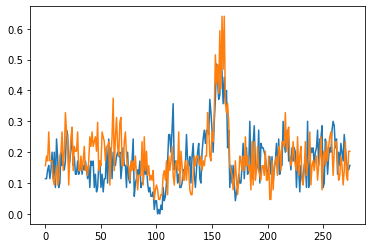

In [132]:
plt.plot(trail_averaged_spikes_pn_SG[:,2])
plt.plot(trail_averaged_spikes_pn_PG[:,2])

# Smoothing

In [38]:
FWHM = 20

In [41]:
def fwhm2sigma(fwhm):
    return fwhm / np.sqrt(8 * np.log(2))

sigma = fwhm2sigma(FWHM)